# Alibi Detect

In [2]:
from alibi_detect.datasets import fetch_kdd
intrusions = fetch_kdd()


In [10]:
intrusions.data

array([[8, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [8, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [8, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [18, 0.17, 0.11, ..., 0.01, 0.0, 0.0],
       [12, 0.0, 0.0, ..., 0.01, 0.0, 0.0],
       [35, 0.0, 0.0, ..., 0.01, 0.0, 0.0]], dtype=object)

<AxesSubplot: >

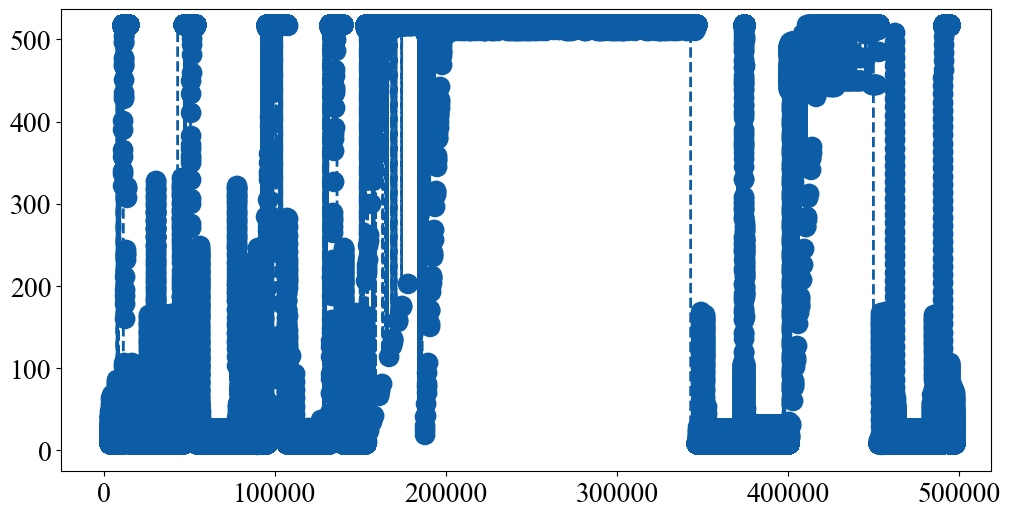

In [11]:
import pandas as pd
pd.Series(intrusions['data'][:, 0]).plot()


In [12]:
from alibi_detect.od import SpectralResidual
od = SpectralResidual(
    threshold=1.,
    window_amp=20,
    window_local=20,
    n_est_points=10,
    n_grad_points=5
)


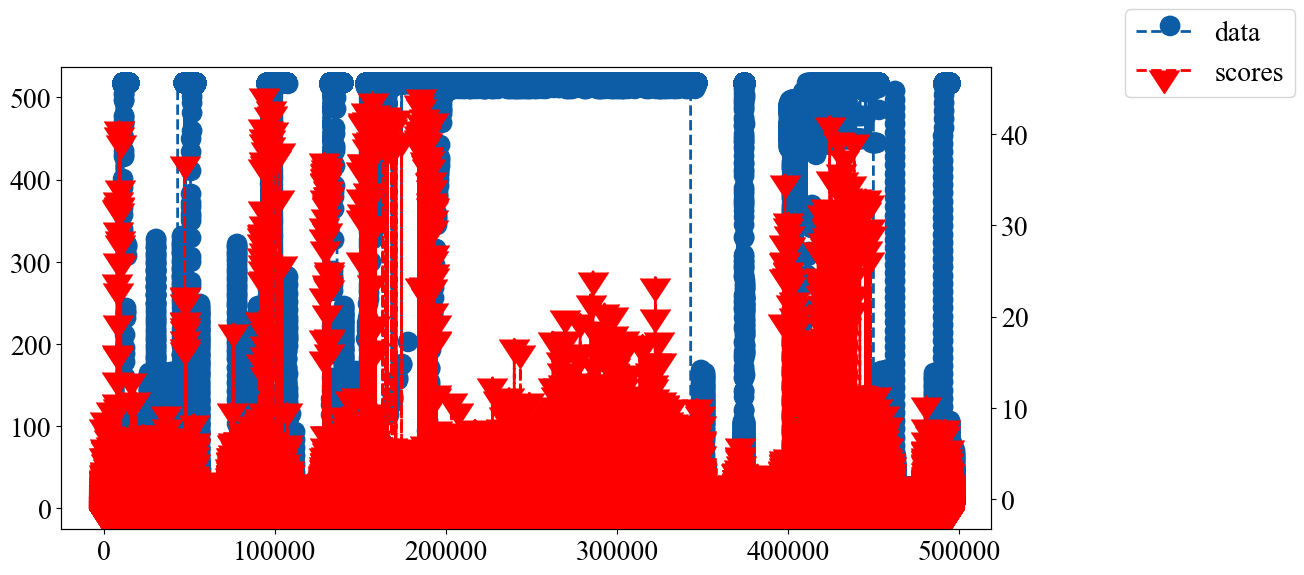

In [20]:
import matplotlib

def plot_outliers(scores):
    ax = pd.Series(intrusions['data'][:, 0], name='data').plot(legend=False, figsize=(12, 6))
    ax2 = ax.twinx()
    ax = pd.Series(scores, name='scores').plot(ax=ax2, legend=False, color="r", marker=matplotlib.markers.CARETDOWNBASE)
    ax.figure.legend(bbox_to_anchor=(1, 1), loc='upper left');

scores = od.score(intrusions['data'][:, 0])
plot_outliers(scores)

# PyOD

### LOF

In [18]:
from pyod.models.lof import LOF
clf = LOF()
clf.fit(intrusions['data'][:, 0].reshape(-1, 1))

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [19]:
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

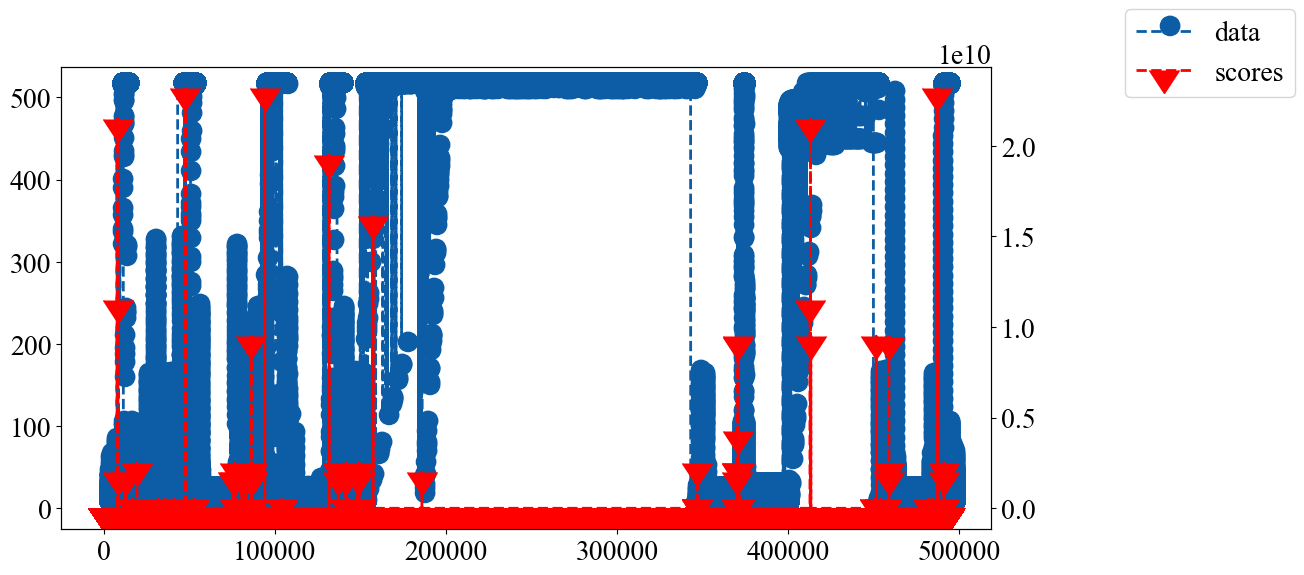

In [21]:
plot_outliers(y_train_scores)

### ECOD


In [23]:
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(intrusions['data'][:, 0].reshape(-1, 1))


ECOD(contamination=0.1, n_jobs=1)

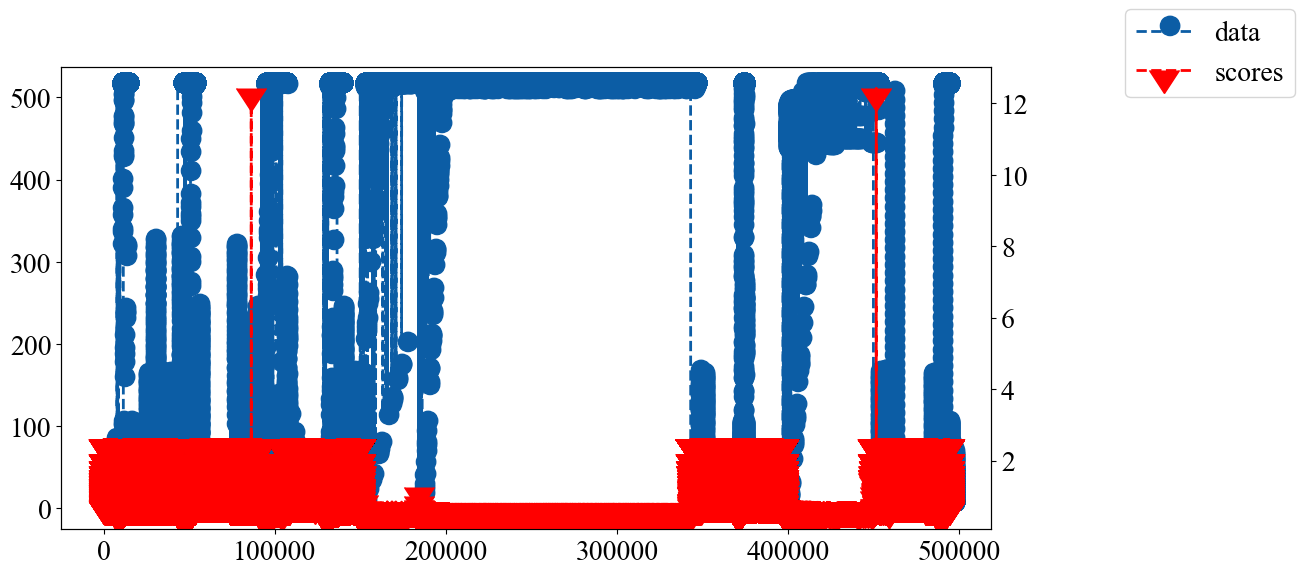

In [24]:
y_train_scores = clf.decision_scores_ 
plot_outliers(y_train_scores)